# Random walks and polymers

## Simple models of polymers

 * polymers have universal properties independent of what they are made of (much like liquids: oil, gasoline, water are very different at the molecular level but are share properties of liquids).
 * the universal properties can be understood using simple models. 
 * separate models for stiff and floppy polymers
 
 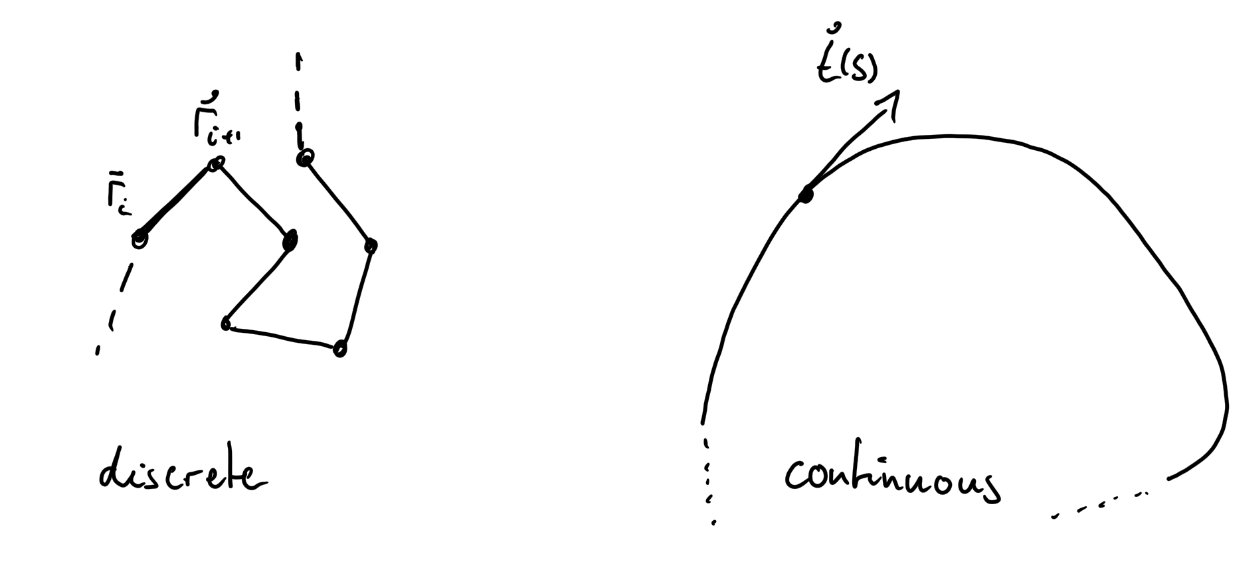

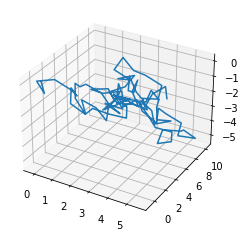

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# return a vector on the sphere with angles theta (polar) and phi (azimuth)
# see https://en.wikipedia.org/wiki/Spherical_coordinate_system
def unit_vector(phi, theta):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return (x,y,z)    

# pick a random vector such that each direction is equally likely
def random_unit_vector():
    phi = np.random.uniform(0,np.pi*2)  # any azimuth is equally likely
    costheta = np.random.uniform(-1,1)  # theta around pi/2 are more likely than 0 or pi
    theta = np.arccos(costheta)
    return unit_vector(phi, theta)

def freely_jointed_chain(N, d):
    # initial position
    positions = [ np.array([0,0,0]) ]
    for n in range(N):
        # increment position 
        positions.append(positions[-1] + d*random_unit_vector())
    return np.array(positions)

d = 1
N = 100

positions = freely_jointed_chain(N,d)

# plot the trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:,0], positions[:,1], positions[:,2])

#### End-to-end distance
The end-to-end vector of a freely-jointed chain is
$$
\vec{R} = d\sum_{i=1}^N \vec{e}_i
$$
is on average zero, but the average squared end-to-end distance is a meaningful quantity that describes the extension of the polymer.
$$
\langle \vec{R}^2 \rangle = d^2\langle\sum_{i}^N \vec{e}_i\sum_{j}^N \vec{e}_j\rangle = d^2\sum_{i,j=1}^N \langle\vec{e}_i\vec{e}_j\rangle 
$$
The terms $\langle\vec{e}_i\vec{e}_j\rangle$ are the average length of the projection of vector $i$ onto vector $j$.
Now split the sum into parts with $i=j$ and $i\neq j$ and observe that $\langle\vec{e}_i\vec{e}_j\rangle$ equals 1 for $i=j$ and 0 for $i\neq j$:
$$
\langle \vec{R}^2 \rangle = d^2\sum_{i=1}^N \langle \vec{e}_i^2 \rangle + d^2\sum_{i,j=1, i\neq j}^N \langle \vec{e}_i\vec{e}_j \rangle = d^2N
$$
Hence as with the random walks and diffusion, we find that the end-to-end distance grows as the square-root of the number of monomers. 

### Large scale chromatin structure
Despite the simplicity of this model, the basic dependence of the end-to-end distance on the length of the polymer is observed in biology.
[Engh et al.](https://science.sciencemag.org/content/257/5075/1410) measured the distance between two position on the human chromosome 4 labeled with fluorescent probes. 
These measurements were repeated for many pairs of positions varying between $10^5$ and $4\times 10^6$ base pairs. 
When plotting the mean-squared marker-to-marker distance against they separation on the chromosome, [Engh et al.](https://science.sciencemag.org/content/257/5075/1410) observed a linear relationship consistent a freely jointed chain model.

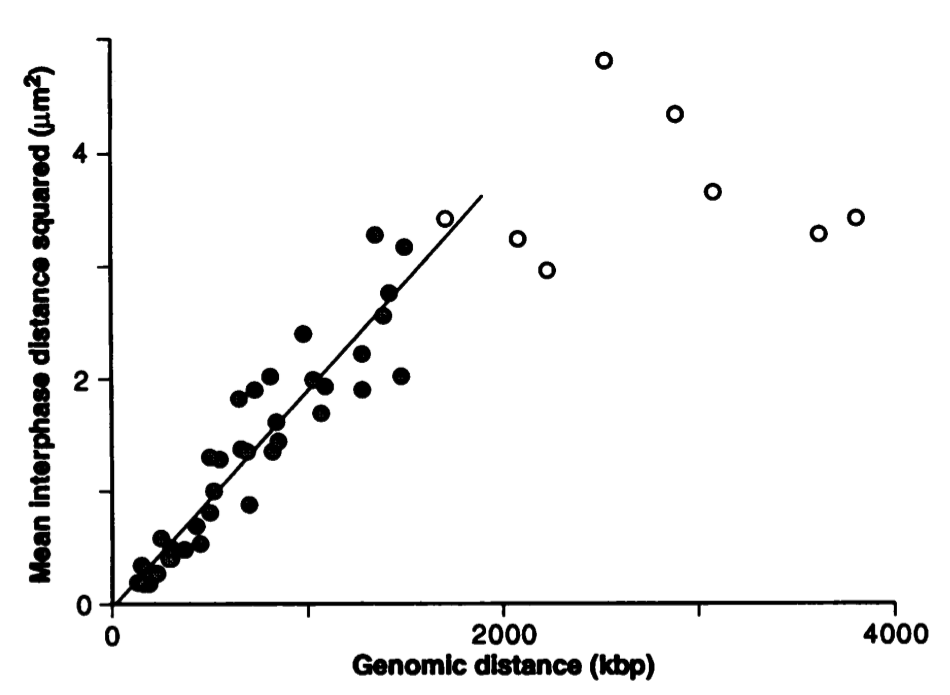


We will revisit this data in an exercise and in following lectures. 

## Stiff polymers
In the previous section, we assumed that the direction of monomers completely randomizes at each junction. 
In reality, the degree to which direction changes is of course constrained and not completely random. 
There are different ways in which such stiffness can be incorporated into models and the overall conformation of the polymer depends on the relation of stiffness to the length of the polymer.

There are two major ways in which such effects are modelled. 
One is by restricting the bond angles of discrete and stiff segments (freely rotating chain), the other is by modeling the polymer as a continuous chain with some stiffness (worm-like chain).

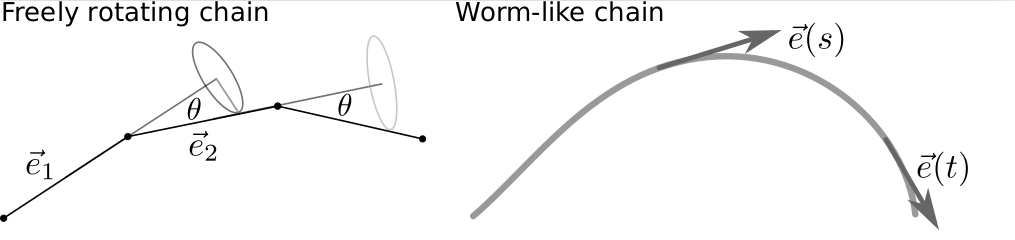

### Freely rotating chain
In this model, bond of two segments is contraint such that the polymer can rotate freely around the azimuth, but has a constrained polar angle $\theta$, either on average or to a fixed value:
$$
\langle \vec{e}_i\vec{e}_{i+1} \rangle = \cos \theta
$$
This has the consequence that the direction of the polymer changes slowly if $\theta$ is small, which we now explore via simulations:


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# return a vector on the sphere with angles theta (polar) and phi (azimuth)
# see https://en.wikipedia.org/wiki/Spherical_coordinate_system
def unit_vector(phi, theta):
    x = np.sin( theta) * np.cos( phi )
    y = np.sin( theta) * np.sin( phi )
    z = np.cos( theta )
    return (x,y,z)    

# return a matrix that rotates a vector 0,0,1 to vec
def rotation_matrix(vec):
    length_xy = np.sqrt(np.sum(vec[:2]**2))
    length = np.sqrt(np.sum(vec**2))
    phi = np.arccos(vec[0]/length_xy)*np.sign(vec[1])
    theta = np.arccos(vec[2]/length)
    xy_rotation = np.array([[np.cos(phi), -np.sin(phi),0],
                     [np.sin(phi), np.cos(phi),0],
                     [0, 0, 1]])
    xz_rotation = np.array([[np.cos(theta), 0 , np.sin(theta)],
                     [0, 1, 0],
                     [-np.sin(theta), 0, np.cos(theta)]])
    # first rotate the vector by theta in the xz plane, followed by phi in the xy plane
    return xy_rotation.dot(xz_rotation)

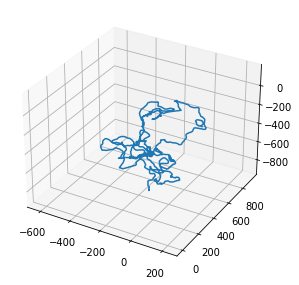

In [13]:
# pick a random new direction given the last direction vec and the angle constraint theta
def new_direction(vec, theta):
    phi = np.random.uniform(0,2*np.pi)
    e = unit_vector(phi, theta)
    return rotation_matrix(vec).dot(e)

# make a freely rotating chain of length N with angle constraint theta and segment length d
def freely_rotating_chain(N, d, theta):
    # initial position
    positions = [ np.array([0,0,0]) ]
    directions = [ np.array([1,0,0]) ]
    for n in range(N):
        # increment position 
        directions.append(new_direction(directions[-1], theta))
        positions.append(positions[-1] + d*directions[-1])

    return np.array(positions)


d = 1
N = 10000
theta = 10/180*np.pi
positions = freely_rotating_chain(N,d=1, theta=theta)

# plot the trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:,0], positions[:,1], positions[:,2])
plt.tight_layout()

### [Lecture notes on chromatin structure](https://neherlab.org/20181213_theoretical_biophysics.html)

https://neherlab.org/20181213_theoretical_biophysics.html


